In [1]:
#import required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Data Preparation and Feature Engineering

In [2]:
# loading dataset from drive folder 
data = pd.read_csv("Employee Turnover.csv")
print(data, "\n")

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  quit  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

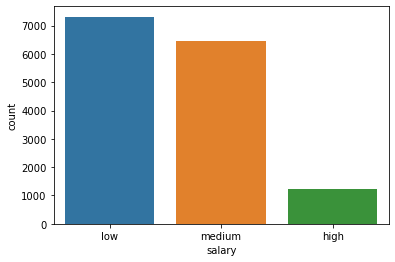

In [5]:
# Count of students of each class
sns.countplot(data['salary'])

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='count'>

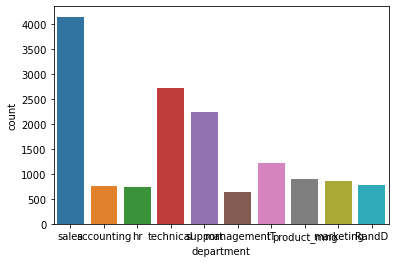

In [6]:
# Count of students of each class
sns.countplot(data['department'])

<AxesSubplot:xlabel='department', ylabel='count'>

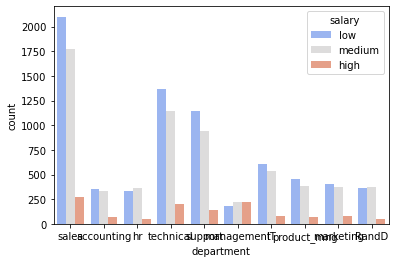

In [7]:
# Student class by gender
sns.countplot(x='department',hue='salary',data=data,palette='coolwarm')

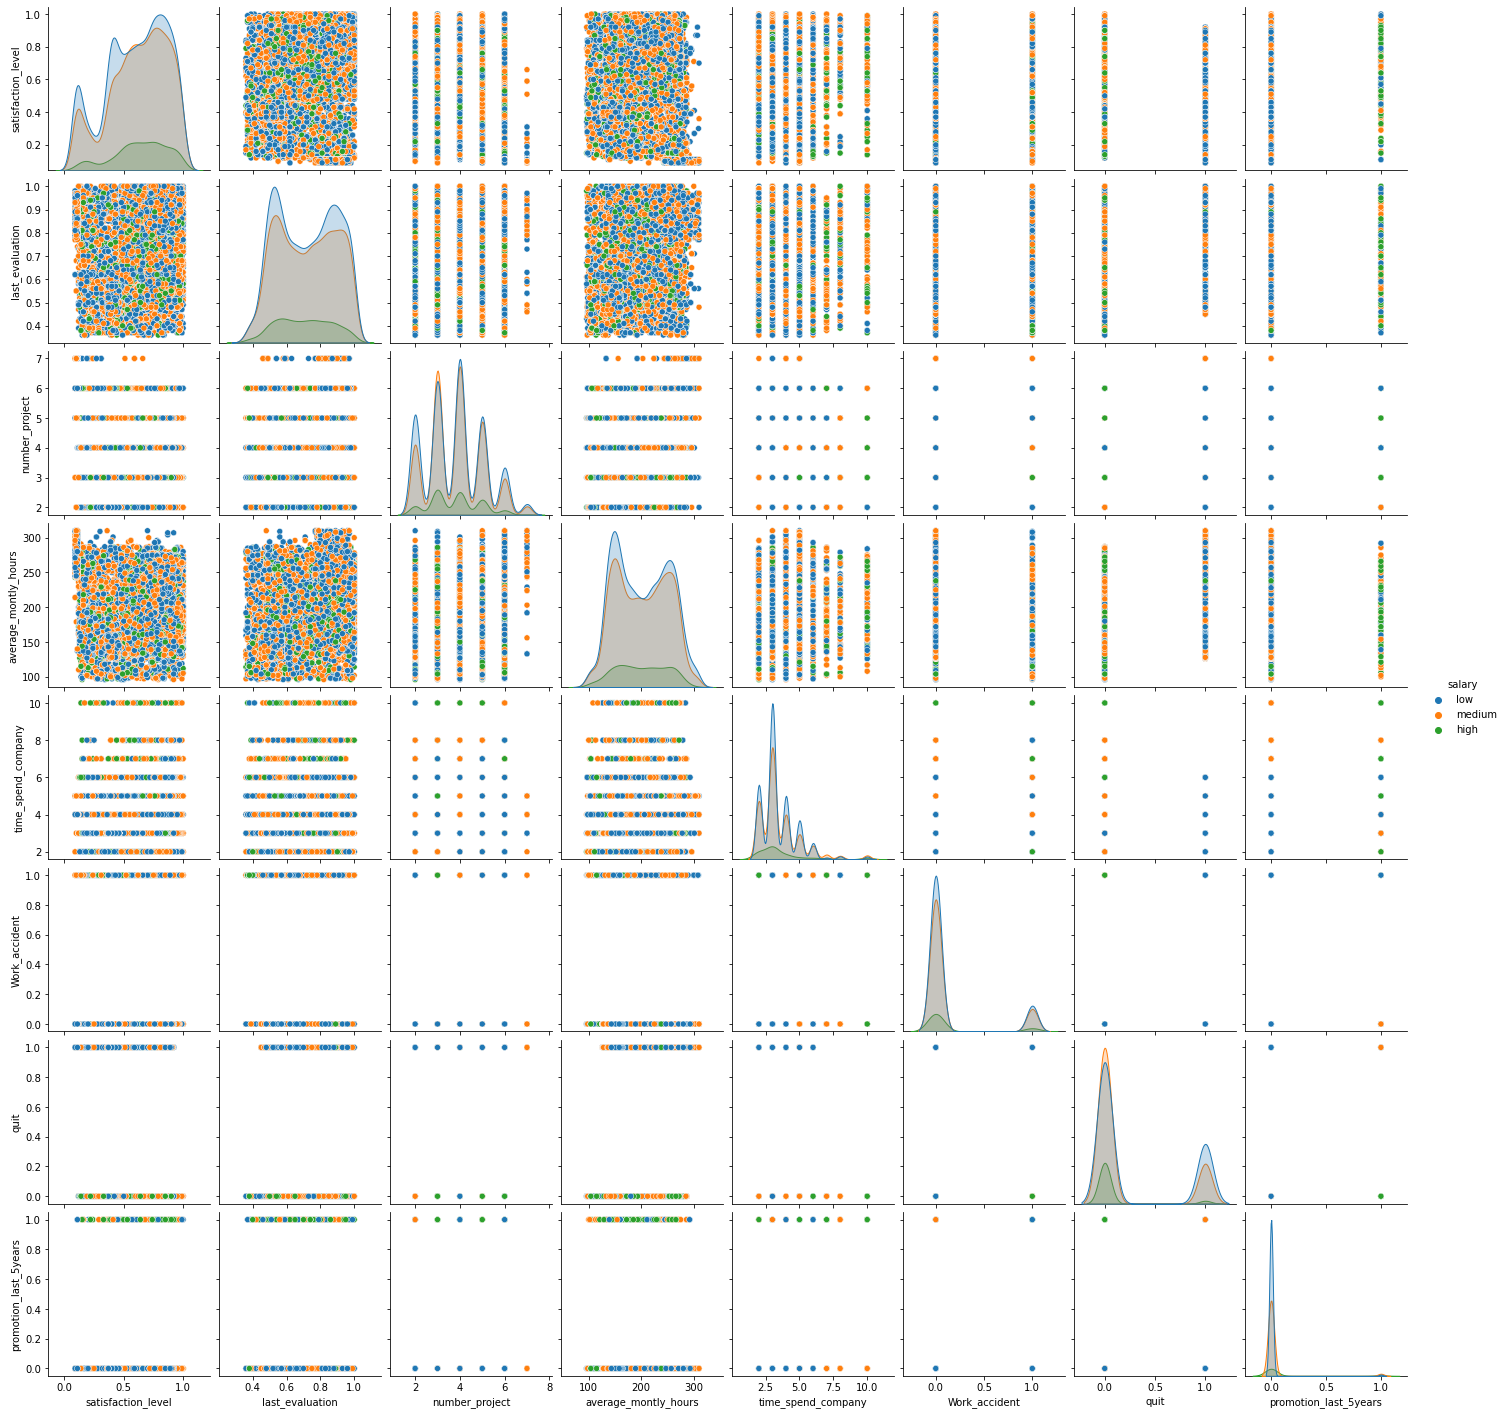

In [8]:
# Countplot based on the student Class
sns.pairplot(data,hue='salary')

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
le.fit(data['salary'])

LabelEncoder()

In [11]:
data['salary'] = le.fit_transform(data['salary'])

In [12]:
data['department'] = le.fit_transform(data['department'])

In [13]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [14]:
y= data['quit']

In [15]:
data.drop(['quit'],axis=1, inplace =True)

In [16]:
X = data

In [17]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [18]:
#Standardize the dataset using standard scaler
scaler = StandardScaler()     # 0.8, 0.5,2,150,3,0,0,6,1
scaler.fit(X)
scaled = scaler.transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Logistic Regression

In [20]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [21]:
log = LogisticRegression(random_state=5)

In [22]:
log.fit(X_train, y_train)

C:\Users\Shubham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

In [23]:
y_pred = log.predict(X_test)

In [24]:
print("Testing Accuracy ",accuracy_score(y_test, y_pred))

Testing Accuracy  0.7595555555555555


Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



Confusion matrix


<AxesSubplot:>

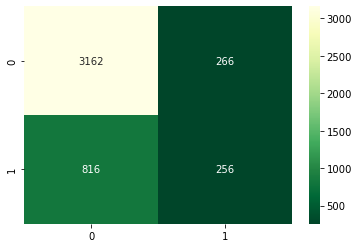

In [25]:
print('Logistic Regression Classifier' + '\n')
print(classification_report(y_test,y_pred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='YlGn_r',annot=True,fmt='g')

# SVM Classifier

In [26]:
from sklearn import svm
svm_clf = svm.SVC()

In [27]:
svm_clf.fit(X_train, y_train)

SVC()

In [28]:
y_pred_svm = svm_clf.predict(X_test)

In [29]:
print("Testing Accuracy ",accuracy_score(y_test, y_pred_svm))

Testing Accuracy  0.7846666666666666


SVM Classifier

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3428
           1       1.00      0.10      0.18      1072

    accuracy                           0.78      4500
   macro avg       0.89      0.55      0.53      4500
weighted avg       0.83      0.78      0.71      4500



Confusion matrix


<AxesSubplot:>

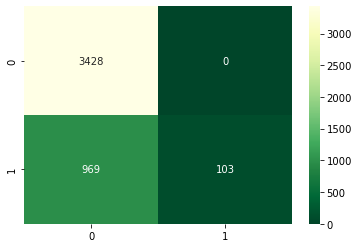

In [30]:
print('SVM Classifier' + '\n')
print(classification_report(y_test,y_pred_svm))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,y_pred_svm),cmap='YlGn_r',annot=True,fmt='g')

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
DTree = DecisionTreeClassifier(max_depth=5) 

In [33]:
DTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [34]:
y_train_pred = DTree.predict(X_train) 
print("Training Accuracy ",accuracy_score(y_train, y_train_pred)) 

Training Accuracy  0.9779979045623393


In [35]:
y_train_predict = DTree.predict(X_test)
DTree.fit(X_test,y_test) 

DecisionTreeClassifier(max_depth=5)

In [36]:
print("Testing Accuracy ",accuracy_score(y_test,y_train_predict))

Testing Accuracy  0.9702222222222222


Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3428
           1       0.95      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



Confusion matrix


<AxesSubplot:>

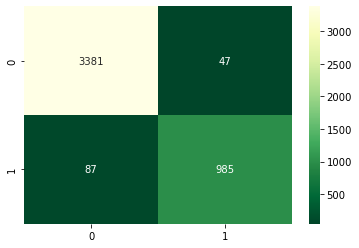

In [37]:
print('Decision Tree Classifier' + '\n')
print(classification_report(y_test,y_train_predict))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,y_train_predict),cmap='YlGn_r',annot=True,fmt='g')

In [38]:
# import pickle
# pickle_out = open("classifier.pkl","wb")
# pickle.dump(DTree, pickle_out)
# pickle_out.close()

In [39]:
input_f = np.array([0.8,0.5,2,150,3,0,0,6,1])
input_f = input_f.reshape(1,-1)

In [40]:
df = pd.DataFrame(input_f, columns = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','department','salary'])

In [41]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.8,0.5,2.0,150.0,3.0,0.0,0.0,6.0,1.0


In [42]:
y_train_pred2 = DTree.predict(df)

In [43]:
y_train_pred2

array([0], dtype=int64)